In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import seaborn
import squarify
# import mlxtend

In [3]:
df = pd.read_csv('data.csv', engine='python', skipfooter=5)
moto = pd.read_csv('moto.csv')

df.head()

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,CO2 emissions (kt),EN.ATM.CO2E.KT,Germany,DEU,955310.000000,932370.000000,892750.000000,887010.000000,875810.000000,873090.000000,...,746380,760020,777630,737490,742310,747150,732200,709540,..,..
1,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,Germany,DEU,6639.731691,6564.797195,6445.874000,6288.416350,6244.957228,6327.709754,...,7281.27217417162,7270.15252302734,7217.52908915495,7035.48297471676,..,..,..,..,..,..
2,Electricity production from coal sources (% of...,EG.ELC.COAL.ZS,Germany,DEU,58.731124,59.146066,57.124413,57.378461,56.528022,55.622600,...,44.8562977991792,46.0164689811742,47.241229490714,45.8101932990105,44.2628091617821,..,..,..,..,..
3,Electricity production from hydroelectric sour...,EG.ELC.HYRO.ZS,Germany,DEU,3.181959,2.779074,3.259867,3.421712,3.794709,4.087730,...,2.91010954699059,3.48795449225451,3.63349106162463,3.14934929205162,2.9606828432665,..,..,..,..,..
4,Electricity production from natural gas source...,EG.ELC.NGAS.ZS,Germany,DEU,7.387930,6.738568,6.162774,6.617198,7.663865,8.104141,...,14.3651149156495,12.4418407036513,10.859869340938,10.0122520251215,9.83155139032119,..,..,..,..,..


In [4]:
moto.head()

,body_shape,colour,condition,displacement,fuel,has_mfk,performance,price,curb_weight,registration_age,mileage,brand
0,Strasse,schwarz,Neu,947.0,Benzin Bleifrei,True,125.0,9890,285.0,0,1.0,Kawasaki
1,Strasse,rot,Neu,947.0,Benzin Bleifrei,True,125.0,9890,285.0,0,1.0,Kawasaki
2,Strasse,grün,Neu,947.0,Benzin Bleifrei,True,125.0,9890,285.0,0,1.0,Kawasaki
3,Strasse,schwarz,Occasion,948.0,Benzin Bleifrei,True,125.0,11990,285.0,0,10.0,Kawasaki
4,Strasse,grau,Occasion,649.0,Benzin Bleifrei,True,48.0,10500,262.0,12,10.0,Kawasaki


In [5]:
df = df.replace("..", np.nan)

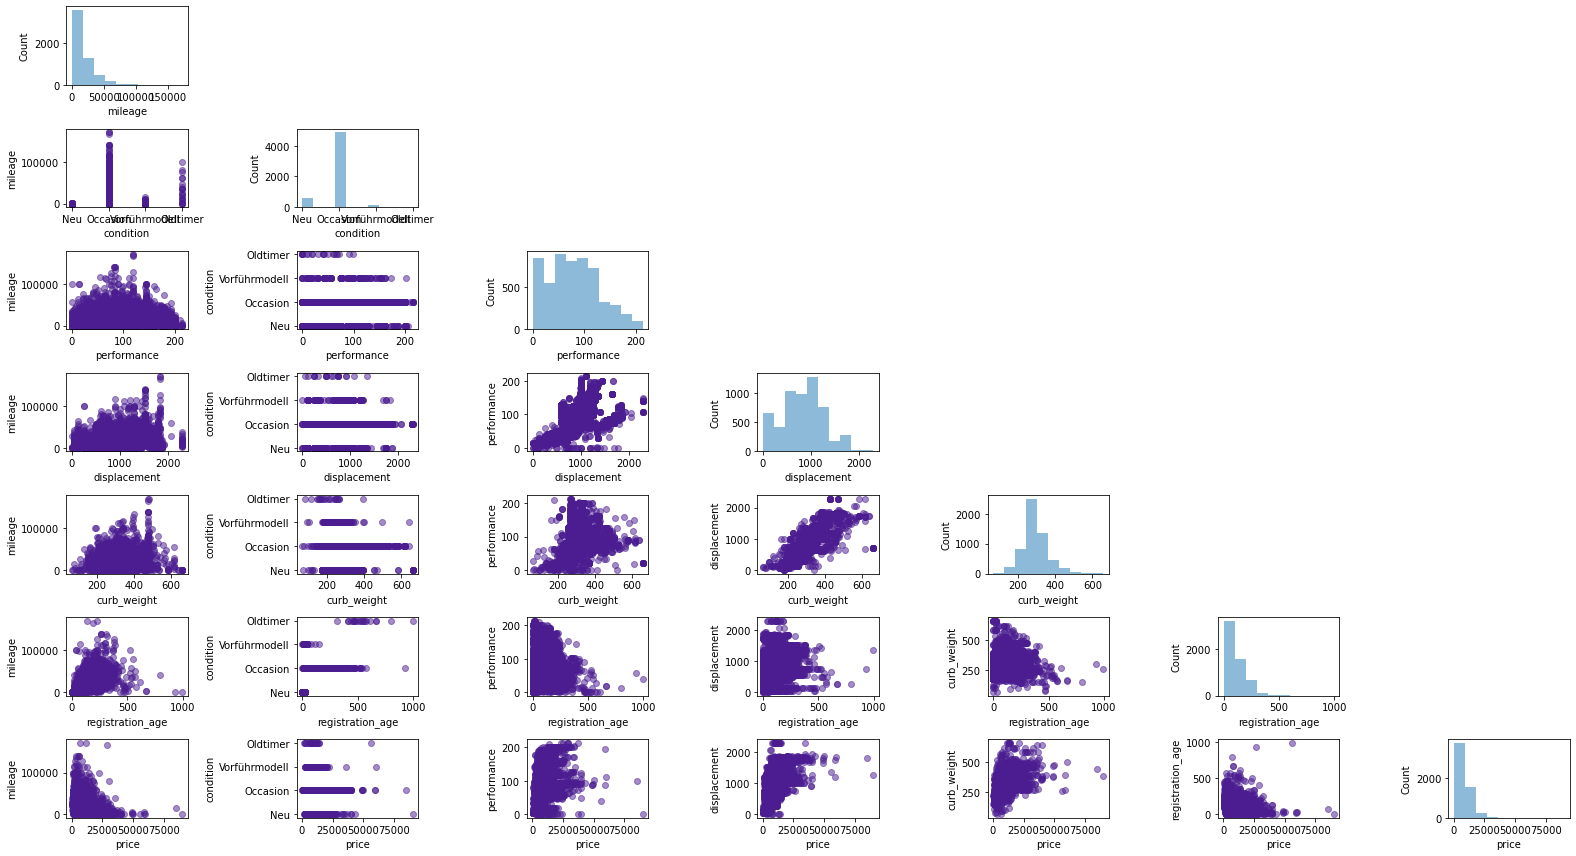

In [6]:
from mlxtend.plotting import scatterplotmatrix
from mlxtend.plotting import heatmap

cols = ['mileage', 'condition', 'performance', 'displacement', 'curb_weight','registration_age', 'price']

scatterplotmatrix(moto[cols].values, figsize=(22,12), names=cols, alpha=0.5, color="#4B1D91CC")

plt.tight_layout()
plt.show()

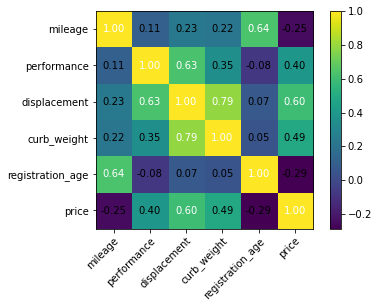

In [7]:
colsHeatmap = ['mileage', 'performance', 'displacement', 'curb_weight','registration_age', 'price']

correlations = np.corrcoef(moto[colsHeatmap].values.T)

hm = heatmap(correlations, row_names=colsHeatmap, column_names=colsHeatmap)
plt.show()

In [8]:
# from pandas_profiling import ProfileReport

# ProfileReport(moto)

In [9]:
# ProfileReport(df)

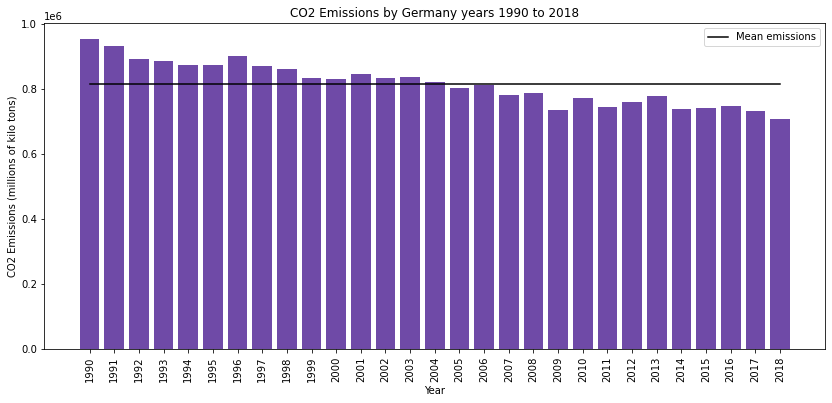

In [10]:
#Bar plots
x = list(df.columns[4:33])
y = list(df.loc[0][4:33])
colors = ["#4B1D91CC","#990F9CCC","#D02F95CC","#EF6674CC","#F2A15ECC","#E7D39ACC"]

for i in range(len(y)):
    try:
        y[i] = float(y[i])
        x[i] = x[i][0:4]
    except:
        y.pop(i)
        x.pop(i)

plt.figure(figsize=(14, 6))

plt.bar(x, y, color="#4B1D91CC")
plt.plot(x, [np.mean(y)]*len(y), color="black")
plt.title("CO2 Emissions by Germany years " + str(x[0]) + " to " + str(x[-1]))
plt.xlabel("Year")
plt.ylabel("CO2 Emissions (millions of kilo tons)")
plt.legend(['Mean emissions'])

plt.xticks(rotation=90)
plt.show()

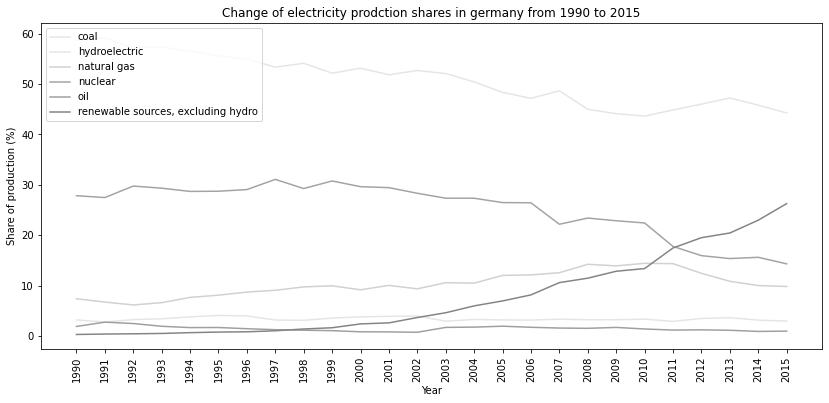

In [11]:
data = []
colors2 = ['#E5E6E4', '#E5E6E4', '#CFD2CD', '#A6A2A2', '#9F9F9F', '#848484']
legend = ['coal',
    'hydroelectric',
    'natural gas',
    'nuclear',
    'oil',
    'renewable sources, excluding hydro']

for i in [2,3,4,5,6,8]:
    data.append(df.loc[i][4:30])
    # legend.append(df.loc[i][0])

plt.figure(figsize=(14, 6))

plt.plot(x[:-3], data[0], color=colors2[0])
plt.plot(x[:-3], data[1], color=colors2[1])
plt.plot(x[:-3], data[2], color=colors2[2])
plt.plot(x[:-3], data[3], color=colors2[3])
plt.plot(x[:-3], data[4], color=colors2[4])
plt.plot(x[:-3], data[5], color=colors2[5])

plt.title("Change of electricity prodction shares in germany from 1990 to 2015")
plt.xlabel("Year")
plt.ylabel("Share of production (%)")
plt.xticks(rotation=90)

plt.legend(legend, loc="upper left")

plt.show()

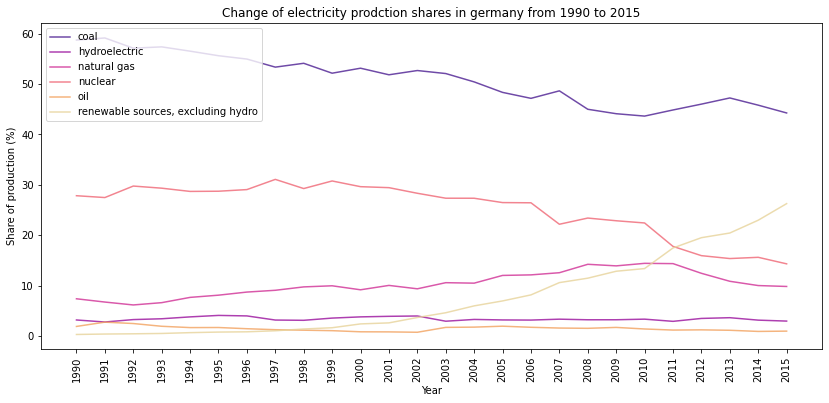

In [12]:
for i in [2,3,4,5,6,8]:
    data.append(df.loc[i][4:30])
    # legend.append(df.loc[i][0])

plt.figure(figsize=(14, 6))

plt.plot(x[:-3], data[0], color=colors[0])
plt.plot(x[:-3], data[1], color=colors[1])
plt.plot(x[:-3], data[2], color=colors[2])
plt.plot(x[:-3], data[3], color=colors[3])
plt.plot(x[:-3], data[4], color=colors[4])
plt.plot(x[:-3], data[5], color=colors[5])

plt.title("Change of electricity prodction shares in germany from 1990 to 2015")
plt.xlabel("Year")
plt.ylabel("Share of production (%)")
plt.xticks(rotation=90)

plt.legend(legend, loc="upper left")

plt.show()

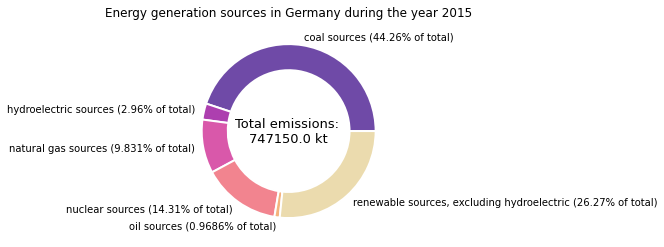

In [13]:
#Donut chart
percentages = []
sectors = []

for i in [2,3,4,5,6,8]:
    percentages.append(float(df.loc[i][29]))
    sectors.append(df.loc[i][0][28:-11] + str(df.loc[i][29])[:-11] + df.loc[i][0][-11:])

circle = plt.Circle( (0,0), 0.7, color="white")

plt.pie(percentages, labels=sectors, colors=colors, wedgeprops = { 'width': 0.3, 'linewidth' : 2, 'edgecolor' : 'white' })
p = plt.gcf()

centerText = "Total emissions: \n" + str(y[-3]) + " kt"

plt.title("Energy generation sources in Germany during the year 2015")
plt.text(0, 0, centerText, ha='center', va='center', fontsize=13)

plt.show()

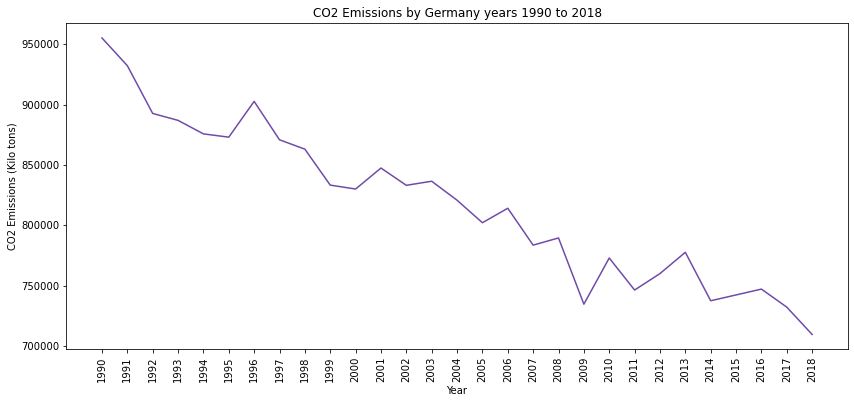

In [14]:
#Line chart
plt.figure(figsize=(14, 6))

plt.plot(x, y, color="#4B1D91CC")
plt.title("CO2 Emissions by Germany years " + str(x[0]) + " to " + str(x[-1]))
plt.xlabel("Year")
plt.ylabel("CO2 Emissions (Kilo tons)")

plt.xticks(rotation=90)
plt.show()

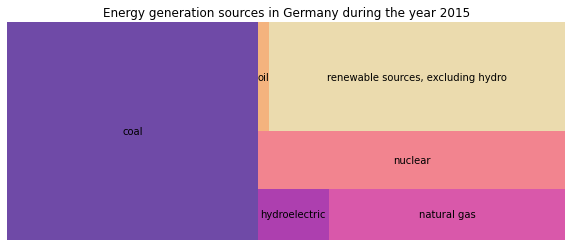

In [15]:
rawSectors = ['coal',
    'hydroelectric',
    'natural gas',
    'nuclear',
    'oil',
    'renewable sources, excluding hydro']

plt.figure(figsize=(10,4))

squarify.plot(sizes=percentages, label=rawSectors, alpha=.8, color=colors, pad=False)
plt.axis('off')
plt.title("Energy generation sources in Germany during the year 2015")
plt.show()

In [16]:
bodyShapes = {}

for i in range(len(moto['body_shape'].unique())):
    bodyShapes[moto['body_shape'].unique()[i]] = i

bodyShapes

{'Strasse': 0,
 'Chopper': 1,
 'Touring': 2,
 'ATVQuad': 3,
 'Scooter': 4,
 'Sonstige': 5,
 'Enduro': 6,
 'Seitenwagen': 7,
 'SupermotoTrial': 8,
 'Trike': 9}

In [17]:
brands = {}

for i in range(len(moto['brand'].unique())):
    brands[moto['brand'].unique()[i]] = i

brands

{'Kawasaki': 0,
 'Suzuki': 1,
 'Husqvarna': 2,
 'Triumph': 3,
 'Ktm': 4,
 'Buell': 5,
 'Bmw': 6,
 'Yamaha': 7,
 'Honda': 8,
 'Aprilia': 9,
 'Harley-davidson': 10,
 'Ducati': 11}

Text(0.5, 1.0, 'Price vs Performance of motocycles (size = curb weight)')

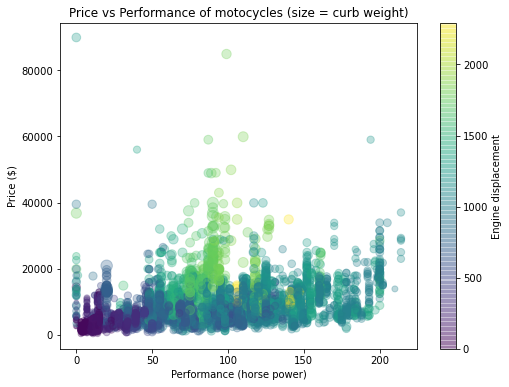

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(moto['performance'], moto['price'], c=moto['displacement'], s=(moto['curb_weight']/5), alpha=0.3, cmap='viridis')
plt.colorbar(label="Engine displacement")
plt.ylabel("Price ($)")
plt.xlabel("Performance (horse power)")
plt.title("Price vs Performance of motocycles (size = curb weight)")

In [19]:
disp0to150 = moto.loc[moto['displacement'] <= 150]
disp150to400 = moto.loc[moto['displacement'] <= 400]
disp150to400 = disp150to400.loc[disp150to400['displacement'] > 150]

disp150to400

,body_shape,colour,condition,displacement,fuel,has_mfk,performance,price,curb_weight,registration_age,mileage,brand
41,Scooter,schwarz,Occasion,298.0,Benzin Bleifrei,True,27.0,3600,266.0,69,15000.0,Kawasaki
42,Scooter,grün,Occasion,298.0,Benzin Bleifrei,False,27.0,3550,266.0,69,17150.0,Kawasaki
46,Strasse,grün,Occasion,296.0,Benzin Bleifrei,False,34.0,5300,247.0,69,11500.0,Kawasaki
58,Strasse,weiss,Occasion,296.0,Benzin Bleifrei,True,39.0,5880,243.0,45,10.0,Kawasaki
68,Touring,grün,Occasion,296.0,Andere,True,40.0,4900,289.0,32,6600.0,Kawasaki
...,...,...,...,...,...,...,...,...,...,...,...,...
5589,Strasse,schwarz,Neu,398.0,Benzin,True,45.0,6600,243.0,0,5.0,Kawasaki
5590,Strasse,schwarz matt.,Neu,398.0,Benzin,True,45.0,6780,243.0,0,1.0,Kawasaki
5591,Strasse,schwarz,Occasion,398.0,Benzin,True,45.0,5900,243.0,21,1970.0,Kawasaki
5592,Strasse,grün,Neu,399.0,Benzin,True,45.0,6800,243.0,0,10.0,Kawasaki


Text(0.5, 1.0, 'Price vs Performance of motocycles under 150cc')

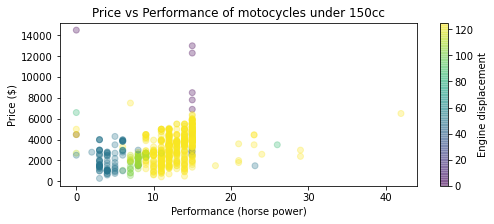

In [20]:
plt.figure(figsize=(8, 3))
plt.scatter(disp0to150['performance'], disp0to150['price'], c=disp0to150['displacement'], alpha=0.3, cmap='viridis')
plt.colorbar(label="Engine displacement")
plt.ylabel("Price ($)")
plt.xlabel("Performance (horse power)")
plt.title("Price vs Performance of motocycles under 150cc")

Text(0.5, 1.0, 'Price vs Performance of motocycles over 150cc and under 450cc')

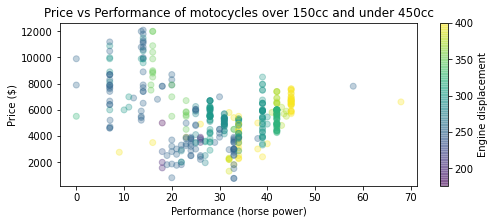

In [21]:
plt.figure(figsize=(8, 3))
plt.scatter(disp150to400['performance'], disp150to400['price'], c=disp150to400['displacement'], alpha=0.3, cmap='viridis')
plt.colorbar(label="Engine displacement")
plt.ylabel("Price ($)")
plt.xlabel("Performance (horse power)")
plt.title("Price vs Performance of motocycles over 150cc and under 450cc")

In [22]:
euEmissions = pd.read_csv('./annual-co2-emissions-per-country.csv')

euEmissions = euEmissions.loc[euEmissions['Entity'] == 'Europe']
euEmissions = euEmissions.loc[euEmissions['Year'] >= 1990]
euEmissions = euEmissions.loc[euEmissions['Year'] <= 2015]

euEmissions.head()

,Entity,Code,Year,Annual emissions
8802,Europe,NaN,1990,8.033274e+09
8803,Europe,NaN,1991,7.736558e+09
8804,Europe,NaN,1992,7.095027e+09
8805,Europe,NaN,1993,6.806846e+09
8806,Europe,NaN,1994,6.447159e+09


In [56]:
areaChartData = []

areaChartData.append(data[0].values)
areaChartData.append(data[1].values)
areaChartData.append(data[2].values)
areaChartData.append(data[3].values)
areaChartData.append(data[4].values)
areaChartData.append(data[5].values)

for i in areaChartData:
    for j in range(len(i)):
        i[j] = float(i[j])

total = np.sum(areaChartData, axis=0) / 100

d0Percent = np.array((areaChartData[0] / total), dtype=float)
d1Percent = np.array((areaChartData[1] / total), dtype=float)
d2Percent = np.array((areaChartData[2] / total), dtype=float)
d3Percent = np.array((areaChartData[3] / total), dtype=float)
d4Percent = np.array((areaChartData[4] / total), dtype=float)
d5Percent = np.array((areaChartData[5] / total), dtype=float)

newY = [y*7500 for y in y[:-3]]

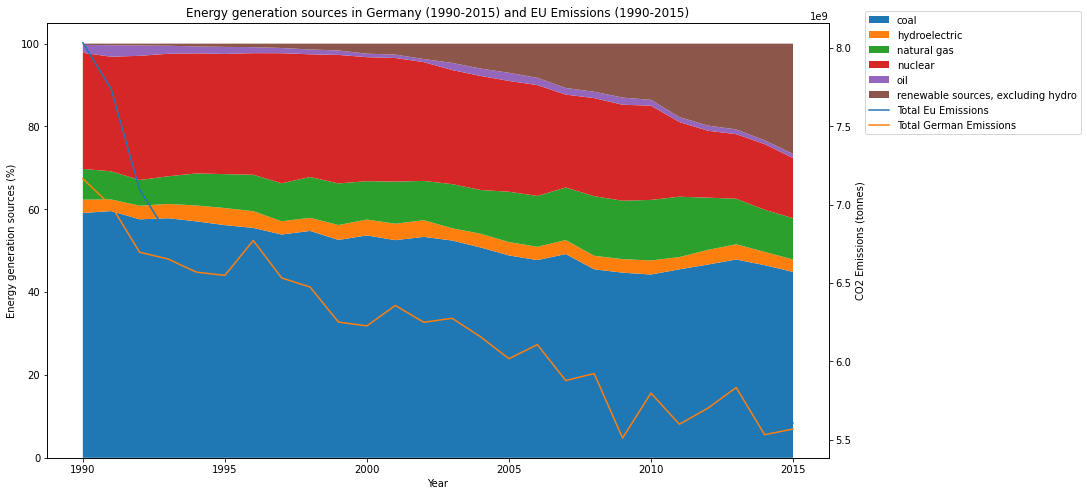

In [57]:
# Plot emissions across the years, background is the 100% stacked area chart of the energy sources in germany
legend2 = legend.append('Eu Emissions')

fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.stackplot(euEmissions['Year'], d0Percent, d1Percent, d2Percent, d3Percent, d4Percent, d5Percent, labels=legend)

ax1.set_title("Energy generation sources in Germany (1990-2015) and EU Emissions (1990-2015)")
ax1.set_xlabel("Year")
ax1.set_ylabel("Energy generation sources (%)")

ax2 = ax1.twinx()

ax2.plot(euEmissions['Year'], (euEmissions['Annual emissions']), label='Total Eu Emissions')
ax2.plot(euEmissions['Year'], newY, label='Total German Emissions')
ax2.set_ylabel("CO2 Emissions (tonnes)")

fig.legend(bbox_to_anchor=(1.15, 0.9), loc='upper right', borderaxespad=0.)

plt.show()

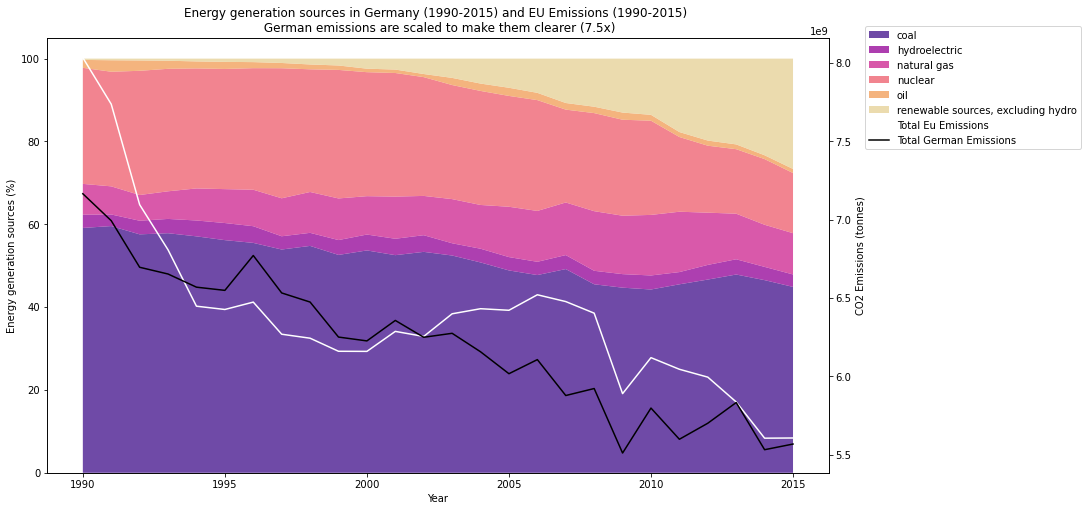

In [69]:
legend2 = legend.append('Eu Emissions')

fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.stackplot(euEmissions['Year'], d0Percent, d1Percent, d2Percent, d3Percent, d4Percent, d5Percent, labels=legend, colors=colors)

ax1.set_title("Energy generation sources in Germany (1990-2015) and EU Emissions (1990-2015) \n German emissions are scaled to make them clearer (7.5x)")
# fig.suptitle("German emissions are scaled to make them clearer (7.5x)", fontsize=10)
ax1.set_xlabel("Year")
ax1.set_ylabel("Energy generation sources (%)")

ax2 = ax1.twinx()

ax2.plot(euEmissions['Year'], (euEmissions['Annual emissions']), label='Total Eu Emissions', color="#FFFFFF")
ax2.plot(euEmissions['Year'], newY, label='Total German Emissions', color="#000000")
ax2.set_ylabel("CO2 Emissions (tonnes)")

fig.legend(bbox_to_anchor=(1.15, 0.9), loc='upper right', borderaxespad=0.)

plt.show()